# Homework 2 Programming Problem 7 (30 points)

## Problem Description

In this problem you will implement polynomial linear least squares regression on two datasets, with and without regularization. Additionally, you will use gradient descent to optimize for the model parameters.

Fill out the notebook as instructed, making the requested plots and printing necessary values. 

*You are welcome to use any of the code provided in the lecture activities.*

#### Summary of deliverables:

Results:
- Print fitted model parameters `w` for the 4 models requested without regularization
- Print fitted model parameters `w` for the 2 models requested *with* $L_2$ regularization
- Print fitted model parameters `w` for the one model solved via gradient descent

Plots:
- 2 plots of each dataset along with the ground truth function
- 4 plots of the fitted function along with the respective data and ground truth function for LLS without regularization
- 2 plots of the fitted function along with the respective data and ground truth function for LLS with $L_2$ regularization
- 1 plot of the fitted function along with the respective data and ground truth function for LLS with $L_2$ regularization solved via gradient descent

Discussion:
- Discussion of challenges fitting complex models to small datasets
- Discussion of difference between the $L_2$ regularized model versus the standard model
- Dicussion of whether gradient descent could get stuck in a local minimum
- Discussion of gradient descent results versus closed form results

#### Imports and Utility Functions:

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def gt_function():
    xt = np.linspace(0,1,101)
    yt = np.sin(2 *np.pi*xt)
    return xt, yt

def plot_data(x,y,xt,yt,title = None):
    # Provide title as a string e.g. 'string'
    plt.plot(x,y,'bo',label = 'Data')
    plt.plot(xt,yt,'g-', label = 'Ground Truth')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.legend()
    if title:
        plt.title(title)
    plt.show()

def plot_model(x,y,xt,yt,xr,yr,title = None):
    # Provide title as a string e.g. 'string'
    plt.plot(x,y,'bo',label = 'Data')
    plt.plot(xt,yt,'g-', label = 'Ground Truth')
    plt.plot(xr,yr,'r-', label = 'Fitted Function')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.legend()
    if title:
        plt.title(title)
    plt.show()

## Load and visualize the data

The data is contained in `d10.npy` and `d100.npy` and can be loaded with `np.load()`. 

Store the data as:
- `x10` and `x100` (the first column of the data)
- `y10` and `y100` (the second column of the data)

Generate the ground truth function $f(x)=\textrm{sin}(2\pi x)$ using `xt, yt = gt_function()`.

Then visualize the each dataset with `plotxy(x,y,xt,yt,title)` with an appropriate title. You should generate two plots.

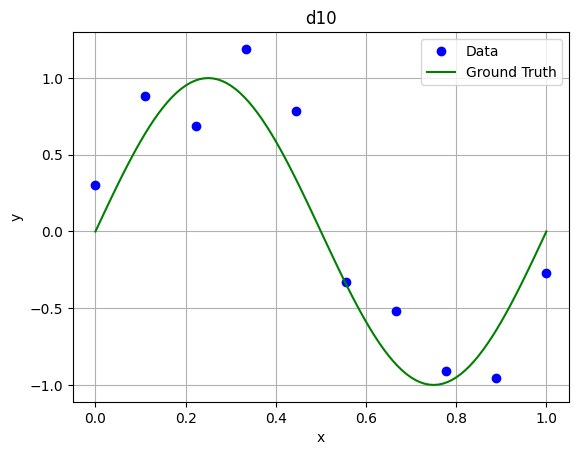

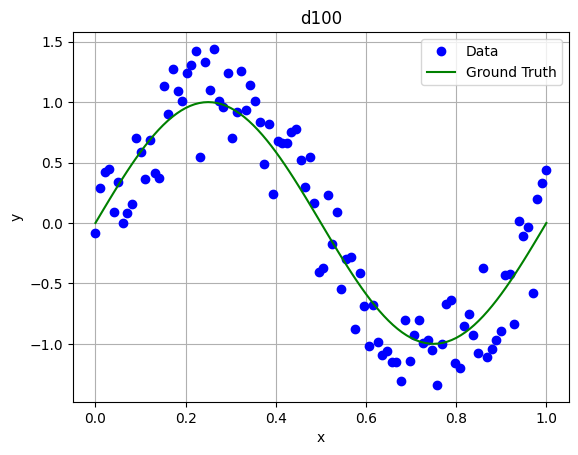

In [49]:
d10 = np.load("d10.npy")
d100 = np.load("d100.npy")

x10 = d10[:,0].reshape(-1,1)
y10 = d10[:,1].reshape(-1,1)
x100 = d100[:,0].reshape(-1,1)
y100 = d100[:,1].reshape(-1,1)

xt, yt = gt_function()

plot_data(x10, y10, xt, yt, "d10")
plot_data(x100, y100, xt, yt, "d100")

## Implement polynomial linear regression

Now you will implement polynomial linear least squares regression without regularization using the closed form solution from lecture to compute the model parameters. You will consider the following 4 cases:

1. Data:  data10.txt, Model: 2nd order polynomial (highest power of $x$ in your regression model = 2)  
1. Data: data100.txt, Model: 2nd order polynomial (highest power of $x$ in your regression model = 2)  
1. Data:  data10.txt, Model: 9th order polynomial (highest power of $x$ in your regression model = 9)  
1. Data: data100.txt, Model: 9th order polynomial (highest power of $x$ in your regression model = 9)

For each model:
- Print the learned model parameters `w`
- Use the model parameters `w` to predict `yr` values over a range of x values given by `xr = np.linspace(0,1,101)`
- Plot the data, ground truth function, and regressed model using `plot_model(x,y,xt,yt,xr,yr,title)` with an appropriate title.

2nd Order LLS on x10:
[[-1.09384447]
 [-0.66283292]
 [ 0.80276877]]


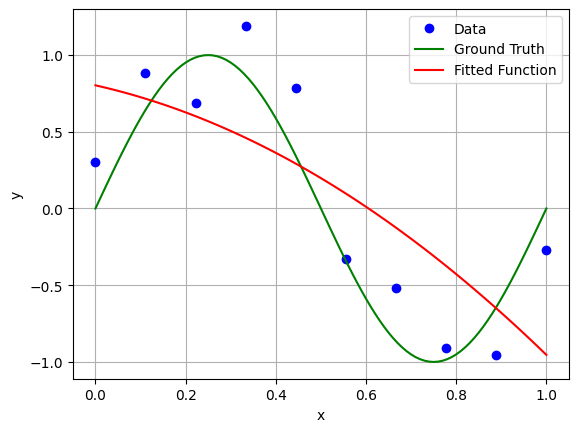

2nd Order LLS on x100:
[[ 0.12128272]
 [-2.04993418]
 [ 0.99435046]]


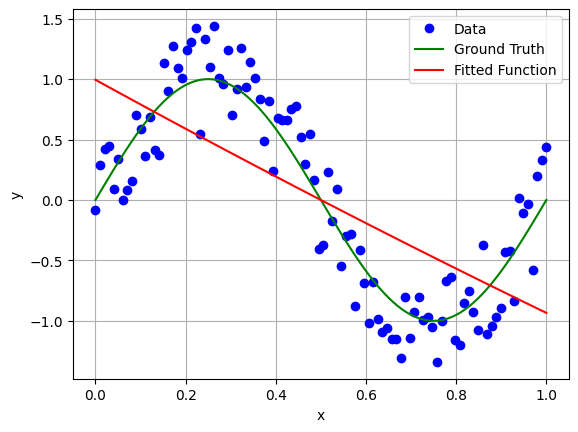

9th Order LLS on x10:
[[-3.91495548e+04]
 [ 1.67474612e+05]
 [-2.96002347e+05]
 [ 2.78781821e+05]
 [-1.50327937e+05]
 [ 4.63121529e+04]
 [-7.65098243e+03]
 [ 5.70103270e+02]
 [-8.43835656e+00]
 [ 2.99999530e-01]]


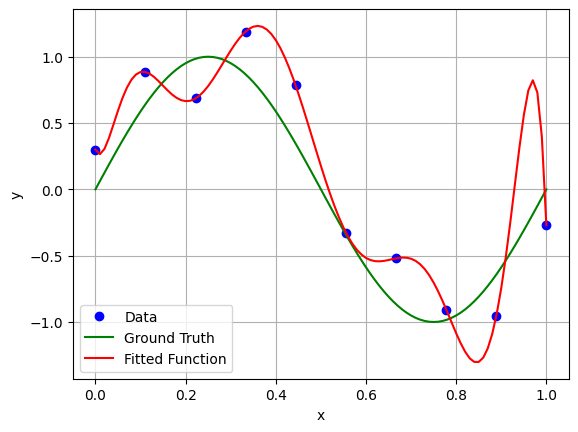

9th Order LLS on x100:
[[-2.21757782e+03]
 [ 1.15792903e+04]
 [-2.48687620e+04]
 [ 2.86930080e+04]
 [-1.95215334e+04]
 [ 8.13290444e+03]
 [-2.07020969e+03]
 [ 2.84954674e+02]
 [-1.18520402e+01]
 [ 2.71583131e-01]]


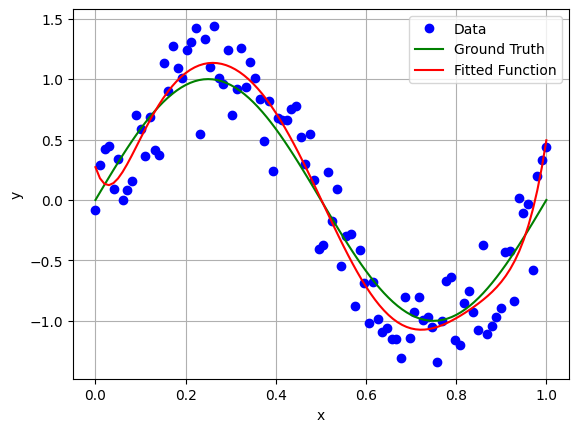

In [50]:
def get_design_matrix(x, order):
    X = np.ones([order+1, len(x)])
    for i in range(order):
        X[i,:] = np.power(x,order-i).reshape(1,-1)
    return X.T

xr = np.linspace(0,1,101)

# 2nd order fit
X10_2 = get_design_matrix(x10,2)
w = np.linalg.inv(X10_2.T @ X10_2) @ X10_2.T @ y10.reshape(-1,1)
print("2nd Order LLS on x10:")
print(w)
plot_model(x10, y10, xt, yt, xr, get_design_matrix(xr,2) @ w)


X100_2 = get_design_matrix(x100,2)
w = np.linalg.inv(X100_2.T @ X100_2) @ X100_2.T @ y100.reshape(-1,1)
print("2nd Order LLS on x100:")
print(w)
plot_model(x100, y100, xt, yt, xr, get_design_matrix(xr,2) @ w)

X10_9 = get_design_matrix(x10,9)
w = np.linalg.inv(X10_9.T @ X10_9) @ X10_9.T @ y10.reshape(-1,1)
print("9th Order LLS on x10:")
print(w)
plot_model(x10, y10, xt, yt, xr, get_design_matrix(xr,9) @ w)

X100_9 = get_design_matrix(x100,9)
w = np.linalg.inv(X100_9.T @ X100_9) @ X100_9.T @ y100.reshape(-1,1)
print("9th Order LLS on x100:")
print(w)
plot_model(x100, y100, xt, yt, xr, get_design_matrix(xr,9) @ w)


## Discussion:

When the sample size (number of data points) is small, what issues or tendencies do you see with complex models?

The model tends to overfit the data when the sample size is small.

## Implement polynomial linear regression with $L_2$ regularization

You will repeat the previous section, but this time using $L_2$ regularization. Your regularization term should be $\lambda w' \mathbb{I}_m w$, where $\lambda = e^{-10}$, and $\mathbb{I}_m$ is the modified identity matrix that masks out the bias term  from  regularization. 

You will consider only two cases:
1. Data:  data10.txt, Model: 9th order polynomial (highest power of $x$ in your regression model = 9)  
1. Data: data100.txt, Model: 9th order polynomial (highest power of $x$ in your regression model = 9)  

For each model:
- Print the learned model parameters `w`
- Use the model parameters `w` to predict `yr` values over a range of x values given by `xr = np.linspace(0,1,101)`
- Plot the data, ground truth function, and regressed model using `plot_model(x,y,xt,yt,xr,yr,title)` with an appropriate title.

9th Order LLS on x10:
[[-3.5338486 ]
 [-1.84896842]
 [ 2.29997278]
 [ 6.47141056]
 [ 6.80582425]
 [ 0.25321228]
 [-9.30526316]
 [-6.83132438]
 [ 5.10343135]
 [ 0.30633599]]


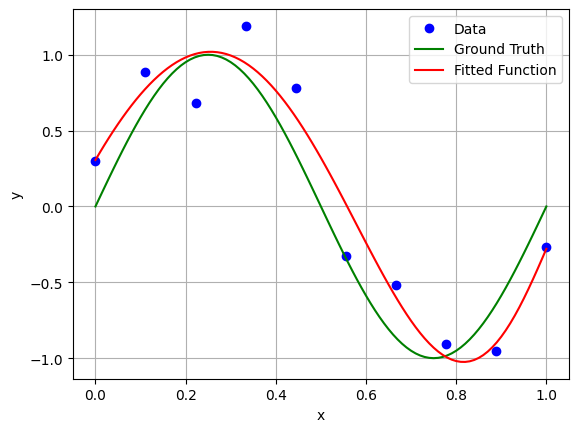

9th Order LLS on x100:
[[ 17.53893754]
 [-22.00647044]
 [-21.06911983]
 [  7.03985659]
 [ 33.82816171]
 [ 20.79696185]
 [-38.38285113]
 [ -5.43884905]
 [  8.07411308]
 [ -0.0974112 ]]


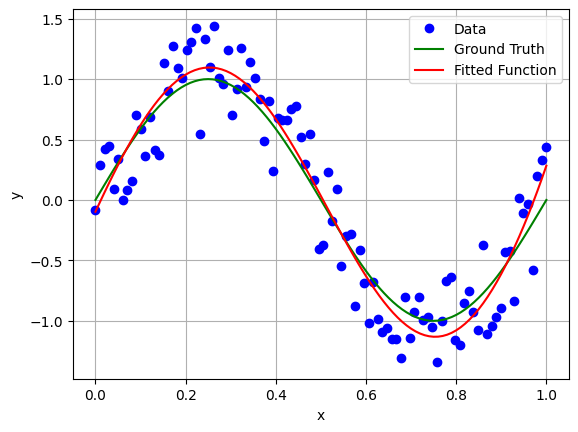

In [51]:
def get_design_matrix(x, order):
    X = np.ones([order+1, len(x)])
    for i in range(order):
        X[i,:] = np.power(x,order-i).reshape(1,-1)
    return X.T

def get_regularized_w(X, y, L, order):
    I_m = np.eye(order+1)
    I_m[-1,-1] = 0

    # YOUR CODE GOES HERE
    # return regularized w
    w = np.linalg.inv(X.T @ X + L*I_m) @ X.T @ y.reshape(-1,1)
    return w

xr = np.linspace(0,1,101)

X10_9 = get_design_matrix(x10,9)
w = get_regularized_w(X10_9, y10, np.power(np.e, -10), 9)
print("9th Order LLS on x10:")
print(w)
plot_model(x10, y10, xt, yt, xr, get_design_matrix(xr,9) @ w)

X100_9 = get_design_matrix(x100,9)
w = get_regularized_w(X100_9, y100, np.power(np.e, -10), 9)
print("9th Order LLS on x100:")
print(w)
plot_model(x100, y100, xt, yt, xr, get_design_matrix(xr,9) @ w)


## Discussion:

What differences between the regularized and standard 9th order models fit to `d10` do you notice? How does regularization affect the fitted function?

The d10 model fits much closer to the ground truth function and has a very similar behavior to the d100 model as compared to the non regularized 9th order fit. Regularizzation seemed to smooth out the over fitted d10 model.

## LLS with $L_2$ regularization and gradient descent

For complex models, the size of $X'X$ can be large, making matrix inversion computationally demanding. Instead, one can use gradient descent to compute $w$. In our notes, we derived the gradient descent approach both for unregularized as well as $L_2$ regularized linear regression. The formula for the gradient descent approach with $L_2$ regularization is:  

$ \frac{\partial obj}{\partial w} = X'Xw - X'y + \lambda \mathbb{I}_m w$

$ w^{new} \leftarrow w^{cur} - \alpha \frac{\partial obj}{\partial w}$


In this problem, could gradient descent get stuck in a local minimum? Explain why / why not?

No it woud not be able to get stuck in a local minimum because the function is convex. This means that there is only a global minimum and can thus not get "stuck" in a local minimum.

You will consider just a single case in the following question:

1. Data:  data10.txt, Model: 9th order polynomial.

Starting with a weight vector of zeros as the initial guess, and $\lambda = e^{-10}$, $\alpha = 0.075$, apply 50000 iterations of
gradient descent to find the optimal model parameters. In practice, when you train your own models you will have to determine these parameters yourself!

For the trained model:
- Print the learned model parameters `w`
- Use the model parameters `w` to predict `yr` values over a range of x values given by `xr = np.linspace(0,1,101)`
- Plot the data, ground truth function, and regressed model using `plot_model(x,y,xt,yt,xr,yr,title)` with an appropriate title.


9th Order LLS on x100:
[[-3.85433823]
 [-0.40357057]
 [ 2.81197044]
 [ 4.91268706]
 [ 4.63898683]
 [ 0.85464551]
 [-5.75985312]
 [-9.34055601]
 [ 5.56768654]
 [ 0.29561607]]


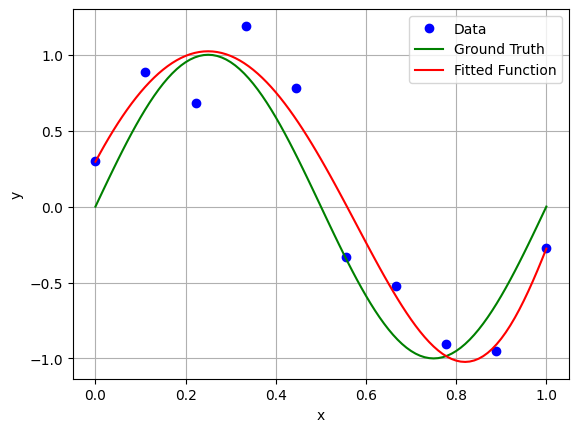

In [52]:
def grad_regularized(X, w, y, L, order):
    I_m = np.eye(order+1)
    I_m[-1,-1] = 0
    gradient = X.T @ X @ w - X.T @ y + L*I_m @ w
    return gradient

order = 9
X = get_design_matrix(x10, 9)
w = np.ones_like(x10)
alpha = 0.075
L = np.power(np.e, -10)
n = 50000
for i in range(n):
    w = w - alpha*grad_regularized(X, w, y10, L, order)

print("9th Order LLS on x100:")
print(w)
plot_model(x10, y10, xt, yt, xr, get_design_matrix(xr,order) @ w)

## Discussion:

Visually compare the result you just obtained to the same 9th order polynomial model with $L_2$ regularization where you solved for `w` directly in the previous section. They should be very similar. Comment on whether gradient descent has converged. 

The L2 regularized w solved for directly looks exactly the same as the one solved for throguh gradient descent. For this reason, it seems to have converged pretty well.